<a href="https://colab.research.google.com/github/akjieettt/data-science-final-project/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality and Chemical Composition

**Group Members**: Hrishi Kabra and Kiet Huynh

**Project Website**: https://akjieettt.github.io/data-science-final-project/

**Github Repository**: https://github.com/akjieettt/data-science-final-project

## Project Overview

Our project will investigate the relationship between chemical composition and wine quality, focusing on identifying which physicochemical properties most strongly predict wine quality and how these relationships differ between red and white wines. Our project aims to provide insights into wine production that could benefit winemakers and consumers.

### Research Questions

**Primary Question**: *What chemical properties most strongly predict wine quality? How do chemical compositions differ between red and white wines, and what are the optimal chemical ranges for high-quality wines?*

**Secondary Question**: *How can we determine ideal food pairings for these wines based on their chemical properties?*

### Background

The quality of a wine depends on its taste, aroma, and texture. These factors are influenced by its chemical makeup. Acidity, sugar, alcohol, and sulphur levels shape how a wine feels and tastes. For example, alcohol adds warmth and body, while acidity changes the freshness and balance of a wine.

By studying these chemical properties, we can better understand what makes a high quality wine instead of just relying on human taste tests.

The dataset we use comes from the Vinho Verde region in Portugal, known for both red and white wines. Each wine sample includes chemical measurements and a quality score (0–10). Analyzing how these chemical features relate to quality helps reveal which factors most strongly influence how a wine is rated.

### Motivation For This Project

Wine production is an art and science where chemical composition determines quality. Understanding these relationships through data science can provide valuable insights for:
- **Winemakers**: Optimizing production processes and chemical formulations
- **Consumers**: Making informed purchasing decisions
- **Industry**: Quality control and standardization

Key factors we're investigating:
- **Chemical Balance**: How different acidity components interact
- **Wine Type Differences**: Red vs white wine chemical requirements
- **Quality Predictors**: Which properties matter most for high ratings
- **Wine and Food Pairings**: Which wines pair with which foods

### Collaboration Plan

**Team Coordination:**
- Set up a private GitHub repository to coordinate all code, share datasets, and track progress
- Each member works on separate branches to implement features, which are merged via pull requests after code review to ensure consistency

**Technologies Used:**
- Version Control: Git and GitHub for source code management and collaboration
- Development Environment: Visual Studio Code Live Share, Google Colab, and Jupyter Notebooks for data analysis and prototyping
- Communication Tools: Small Family Collaboration Hub for offline discussions, FaceTime for online discussions and Google Docs for shared notes

**Meeting Schedule:**
- Consistently meet offline 2 - 3 times per week for 1 - 3 hours per session to discuss progress, solve problems, and coordinate tasks
- Outside of scheduled meetings, we communicate asynchronously via iMessage to stay aligned and share updates

**Task Management:**
- Tasks are divided based on expertise and interest
- Progress is tracked via a shared progress table (in a spreadsheet) to ensure deadlines are met and responsibilities are clear

## Milestone 1: Initial ETL

### Data Sources

Our first dataset is the [**Wine Quality**](https://archive.ics.uci.edu/dataset/186/wine+quality) dataset from UC Irvine's Machine Learning Repository. The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine:

1. **winequality-red**: Data About Red Wines
   - **Source**: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)
   - **Coverage**: Data about 1,599 different Red Wines
   - **Output**: quality rating (0–10) assigned by tasters

2. **winequality-white**: Data About White Wines
   - **Source**: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)
   - **Coverage**: Data about 4,898 different White Wines
   - **Output**: quality rating (0–10) assigned by tasters

Our next dataset is a [**Wine and Food Pairing**](https://www.kaggle.com/datasets/wafaaelhusseini/wine-and-food-pairing-dataset/data) dataset from Kaggle. This contains Wine and Food pairings scored from 1 (Terrible) to 5 (Excellent) based on compatibility of wine style, food flavor profile, and more:

1. **wine_food_pairings**: Data about Wine and Food pairings
   - **Source**: [Kaggle](https://www.kaggle.com/datasets/wafaaelhusseini/wine-and-food-pairing-dataset/data)
   - **Coverage**: Data about 34,933 different White Wines
   - **Output**: Pairing quality from 1-5 (Terrible to Excellent)

### Integration Strategy

We wish to connect the two datasets by matching wine categories, red and white, and creating chemical profiles based on acidity, sweetness, and body levels. After this we could analyze how these chemical properties correlate with pairing success and test if quality score affects pairing versatility.


### Imports and Loading the Data

In [1]:
!git clone https://github.com/akjieettt/data-science-final-project.git
%cd data-science-final-project/

Cloning into 'data-science-final-project'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 144 (delta 22), reused 4 (delta 4), pack-reused 109 (from 1)
Receiving objects: 100% (144/144), 3.21 MiB | 8.19 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/data-science-final-project


In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the wine quality datasets
df_reds = pd.read_csv("data/winequality-red.csv", sep=";")
df_whites = pd.read_csv("data/winequality-white.csv", sep=";")

# Add wine type identifiers for red and white
df_reds['type'] = 'red'
df_whites['type'] = 'white'

# Combine the red and white wine datasets into a single df
df_wines = pd.concat([df_reds, df_whites], ignore_index=True)

# Adding a unique id to each wine
df_wines['wine_id'] = df_wines.index

# Printing the number of wines in each dataset
print(f"Total Number of Red Wines: {len(df_reds)}")
print(f"Total Number of White Wines: {len(df_whites)}")
print(f"Total Number of Wines: {len(df_wines)}")
print(f"Total Number of NaNs:")
display(df_wines.isna().sum())

df_wines.head()

Total Number of Red Wines: 1599
Total Number of White Wines: 4898
Total Number of Wines: 6497
Total Number of NaNs:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,wine_id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,4


### Wine Quality Dataset Overview

We can see above that the dataset has roughly 6500 different wines. It also has 13 different columns, shown below with its corresponding datatype:
1. **fixed acidity**: Ratio
2. **volatile acidity**: Ratio
3. **citric acid**: Ratio
4. **residual sugar**: Ratio
5. **chlorides**: Ratio
6. **free sulfur dioxide**: Ratio
7. **total sulfur dioxide**: Ratio
8. **density**: Ratio
9. **pH**: Interval (logarithmic scale)
10. **sulphates**: Ratio
11. **alcohol**: Ratio
12. **quality**: Ordinal
13. **type**: Nominal
14. **wine_id**: Nominal

Some More Information About The Dataset
- **Total Samples**: 6,497 wines
- **Red Wines**: 1,599 samples
- **White Wines**: 4,898 samples
- **NaNs**: Since there are no NaN's in this dataset, there is no need to modify it further for now.

### Red Wines and White Wines by Quality
Based on this information, we can count the red and white wines by quality

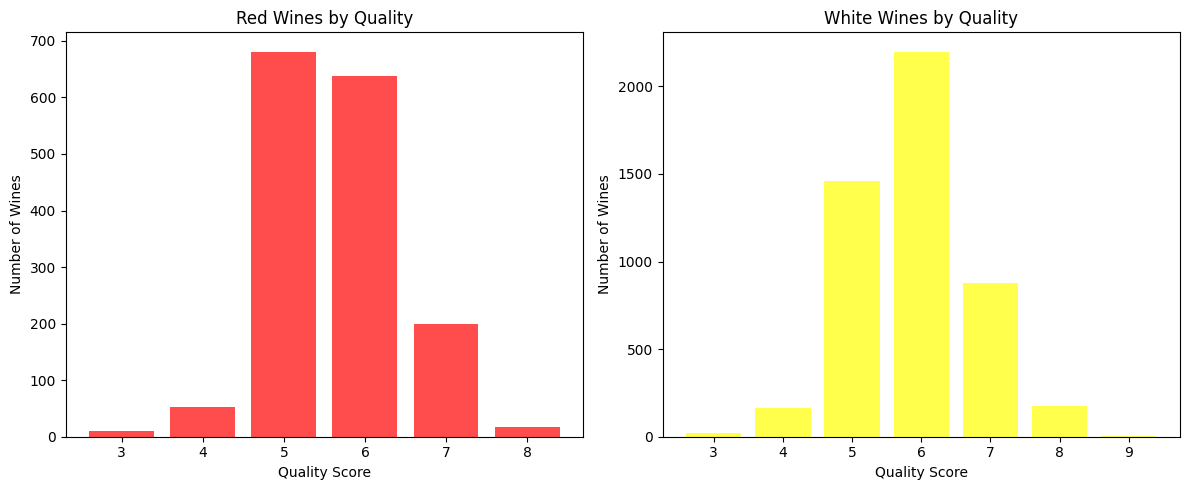

In [3]:
# Count the number of red and white wines by quality
red_quality_count = df_reds['quality'].value_counts().sort_index()
white_quality_count = df_whites['quality'].value_counts().sort_index()

# Create two separate bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Red wines bar chart
ax1.bar(red_quality_count.index, red_quality_count.values, color='red', alpha=0.7)
ax1.set_title('Red Wines by Quality')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Number of Wines')

# White wines bar chart
ax2.bar(white_quality_count.index, white_quality_count.values, color='yellow', alpha=0.7)
ax2.set_title('White Wines by Quality')
ax2.set_xlabel('Quality Score')
ax2.set_ylabel('Number of Wines')

plt.tight_layout()
plt.show()

### Quality and Factors Affecting Quality
Taking a look at the bar chart above, we can see that the quality for the wines ranges from 3 to 9. The data is relatively symmetric and the average is around 5-6. There are many different chemical properties that can affect the quality. Below we are plotting a correlation matrix to see what factors affect the quality of red and white wines.

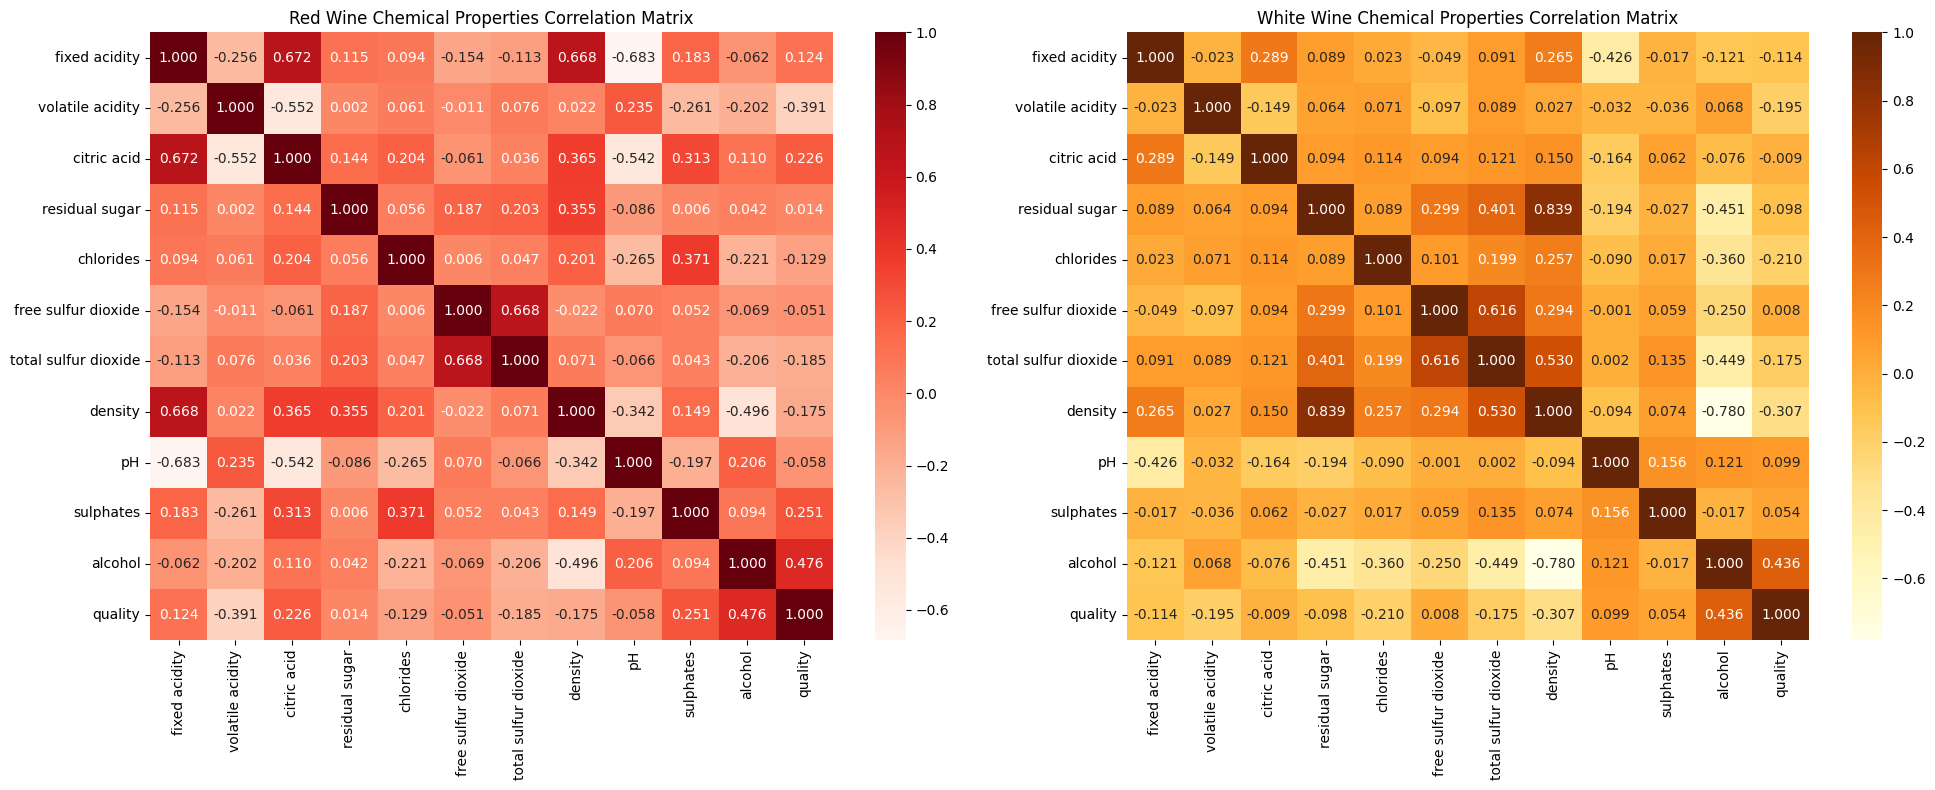

In [4]:
chemical_properties = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] # The different chemical properties

# Correlation Heatmaps for Red and White Wines
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Calculate correlation matrices
red_corr_matrix = df_reds[chemical_properties + ['quality']].corr()
white_corr_matrix = df_whites[chemical_properties + ['quality']].corr()

# Red wine correlation heatmap
sns.heatmap(red_corr_matrix, annot=True, cmap='Reds', fmt='.3f', ax=axes[0])
axes[0].set_title('Red Wine Chemical Properties Correlation Matrix')

# White wine correlation heatmap
sns.heatmap(white_corr_matrix, annot=True, cmap='YlOrBr', fmt='.3f', ax=axes[1])
axes[1].set_title('White Wine Chemical Properties Correlation Matrix')

plt.tight_layout()
plt.show()

### Correlation Insights
From the above correlation plot we can infer that:
- **Alcohol** is a factor that affects the **Quality** of both Red and White Wine
- There is a strong positive correlation between **Alcohol** and **Quality**
- Red Wine: **Sulphates** and **Citric Acid** also has a positive correlation with **Quality**
- White Wine: **Density** and **Chlorides** have a negative correlation with **Quality** and
- **Volatile Acidity**: This has a negative correlation with the **Quality** of both Red and White Wines; however, it has a strong negative correlation with the **Quality** of Red Wines and a weak negative correlation with the **Quality** of White Wines.

### Visualizing Trends
Based on these insights, we can create a scatter plot to look at the trend between some of these variables and the **Quality** of wine.

Starting with **Alcohol**, since it has a strong positive correlation with both, Red and White Wines.

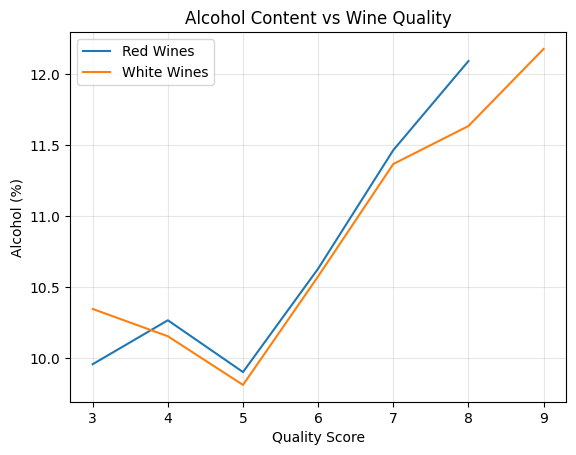

In [5]:
red_quality_mean = df_reds.groupby('quality')['alcohol'].mean() # Grouping the Red Wines by Quality and finding the mean of Alcohol for each quality
white_quality_mean = df_whites.groupby('quality')['alcohol'].mean() # Grouping the White Wines by Quality and finding the mean of Alcohol for each quality

# Plotting the trend
plt.plot(red_quality_mean.index, red_quality_mean.values, label='Red Wines')
plt.plot(white_quality_mean.index, white_quality_mean.values, label='White Wines')
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol (%)')
plt.legend()
plt.grid(True, alpha=0.3)

### Trends Between Alcohol Percentage and Quality
From the above graph we can see that:
- Red and White Wine have a follow a similar trend
- In general, as the alcohol percentage increases, so does the quality of the wine
- We can see a strong positive correlation here

### Wine and Food Pairing Data

In [6]:
# Loading the wine and food pairing data
df_pairing = pd.read_csv("data/wine_food_pairings.csv")
display(df_pairing.head())

print(f"Total Number of Wine and Food Pairings: {len(df_pairing)}\n")
print(f"Total Number of NaNs:")
display(df_pairing.isna().sum())

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment.
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food.
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat.
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment.


Total Number of Wine and Food Pairings: 34933

Total Number of NaNs:


,0
wine_type,0
wine_category,0
food_item,0
food_category,0
cuisine,0
pairing_quality,0
quality_label,0
description,0


### Wine and Food Pairing Dataset Overview

We can see above that the dataset has roughly 3,500 different wine and food pairings. It also has 8 different columns, shown below with its corresponding datatype:
1. **wine type**: Nominal
2. **wine category**: Nominal
3. **food item**: Nominal
4. **food category**: Nominal
5. **cuisine**: Nominal
6. **pairing quality**: Ordinal
7. **quality label**: Ordinal
8. **description**: Nominal


Some More Information About The Dataset
- **Total Wine and Food Pairings**: 34,933 wines
- **Wine Categories**: The different wine categories are Dessert, Fortified, Red, Rosé, Sparkling, and White
- **Food Categories**: Acidic, Cheese, Creamy, Dessert, Pork, Poultry, Red Meat, Salty Snack, Seafood, Smoky BBQ, Spicy, Vegetarian
- **NaNs**: Since there are no NaN's in this dataset, there is no need to modify it further for now.

Since our Wine Quality dataset only has information about Red and White wines, we are going to drop all the Wine and Food Pairings that are not Red or White wines.

In [7]:
# Drop the wine and food pairings that don't have a red or white wine
df_pairing = df_pairing[df_pairing['wine_category'].isin(['Red', 'White'])]
df_pairing.reset_index(drop=True, inplace=True)

df_pairing.groupby('wine_category').size()


,0
wine_category,
Red,12908
White,11193


From this we can see that we have:
- 12,908 Red Wine and Food Pairings
- 11,193 White Wine and Food Pairings

Below we can plot the number of good or excellent pairings. These are Wine and Food pairings that have a `pairing_quality` greater than 3.

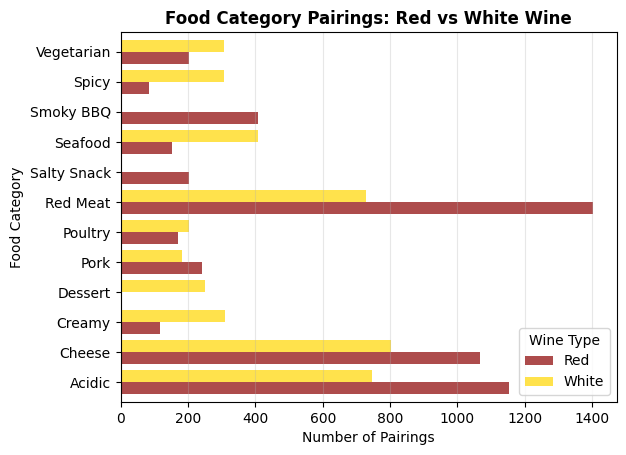

In [8]:
# Filter the dataframe to include only pairings with a quality score greater than 3
excellent_pairings = df_pairing[df_pairing['pairing_quality'] > 3]

# Create a crosstab (frequency table) showing counts of food categories for each wine category
pairing_crosstab = pd.crosstab(excellent_pairings['wine_category'], excellent_pairings['food_category'])


# Transpose the crosstab so that food categories appear on the y-axis
pairing_crosstab.T.plot(kind='barh', width=0.8,
                        color=['darkred', 'gold'], alpha=0.7)
plt.title('Food Category Pairings: Red vs White Wine',
                     fontweight='bold', fontsize=12)
plt.xlabel('Number of Pairings')
plt.ylabel('Food Category')
plt.legend(title='Wine Type', loc='lower right')
plt.grid(axis='x', alpha=0.3)

plt.show()

**Summary**
- Red wine dominates in several categories, especially:
  - Red Meat (by far the highest good-or-excellent pairing count overall)
  - Salty Snack (no good-or-excellent pairing with White wine)
  - Acidic dishes
  - Cheese
  - Smoky BBQ
- White wine excels in:
  - Seafood
  - Vegetarian
  - Spicy dishes
  - Creamy dishes
  - Dessert (no good-or-excellent pairing with Red wine)
- Some categories are more balanced (but still lean slightly one way):
  - Pork (slight red advantage)
  - Poultry (slight white advantage)

**Intepretation**
- Strong traditional pairing patterns appear clearly:
  - Red meat & Red wine is the strongest conventional pairing
  - Seafood & White wine is also a strong conventional pairing
- Red wine tends to pair better with bold, flavorful foods:
  - Barbecue, cheese, salty snacks, and acidic foods all lean heavily toward red wine
- White wine tends to pair better with lighter, delicate foods:
  - Vegetarian, seafood, and spicy dishes all show higher white wine pairing counts
  - White wine also pairs well with cream-based dishes and desserts
- Some categories are surprisingly competitive:
  - Pork and poultry show a narrower difference, suggesting that these “middle-ground meats” can successfully pair with either type depending on preparation and seasoning
- Overall, Red wine has higher total pairings across categories

### Chemical Properties and Wine Quality


We can examine the `description` column from df_pairing to examine the relationship between the chemical properties of wine and the key characteristics of food

The `description` column provides brief explanations that justify why certain wine–food combinations succeed or fail. These descriptions capture common pairing heuristics (such as acidity balance, tannin–fat interactions, and flavor intensity matching) and also include a few deliberately bad examples for contrast.

The table acts as a reference for understanding the logic behind pairing ratings.

In [9]:
df_pairing.groupby('description').size()

,0
description,
Acidic wine balances acidic food.,1850
Acidic wine balances acidic food.; Dry table wine clashes with dessert sweetness.,153
Crisp acidity suits seafood.,587
Deliberately bad pairing example for contrast.,3845
Delicate wine overwhelmed by red meat.,1254
Dry table wine clashes with dessert sweetness.,441
Heavy wine can dominate poultry.,97
Heuristic pairing assessment.,9035
High tannin intensifies spice heat.,48


The summary of wine-food pairings highlights four key characteristics: **acidity**, **tannins**, **body**, and **sweetness**, each corresponding to a chemical property that determines compatibility:
- **Acidity** is measured by **fixed acidity**
- **Tannins** is measured by **sulphate levels**
- **Body** is measured by **alcohol** content
- **Sweetness** is measured by **residual sugar**

Below, we divide each property into discrete levels to simplify analysis and comparison across wines:
- **Acidity** reflects `fixed acidity`: Low, Medium, High
- **Sweetness** reflects `residual sugar`: Dry, Off-Dry, Sweet
- **Body** reflects `alcohol`: Light, Medium, Full
- **Tannin** reflects `sulphates`: Low, Medium, High

In [10]:
# Create chemical categories for pairing analysis
df_wines['acidity_level'] = pd.cut(df_wines['fixed acidity'],
                                     bins=[0, 7, 9, 15],
                                     labels=['Low', 'Medium', 'High'])

df_wines['sweetness_level'] = pd.cut(df_wines['residual sugar'],
                                       bins=[0, 2, 10, 100],
                                       labels=['Dry', 'Off-Dry', 'Sweet'])

df_wines['body_level'] = pd.cut(df_wines['alcohol'],
                                  bins=[0, 10, 11.5, 15],
                                  labels=['Light', 'Medium', 'Full'])

df_wines['tannin_proxy'] = pd.cut(df_wines['sulphates'],
                                    bins=[0, 0.5, 0.7, 2],
                                    labels=['Low', 'Medium', 'High'])

df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,wine_id,acidity_level,sweetness_level,body_level,tannin_proxy
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,Medium,Dry,Light,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1,Medium,Off-Dry,Light,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,2,Medium,Off-Dry,Light,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,3,High,Dry,Light,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,4,Medium,Dry,Light,Medium


Categorization of Chemical Properties:

- **Acidity**: **Low** (`fixed acidity`: 0-7), **Medium** (`fixed acidity`: 7–9), **High** (`fixed acidity`: 9–15)

- **Sweetness**: **Dry** (`residual sugar`: 0–2), **Off-Dry** (`residual sugar`: 2–10), **Sweet** (`residual sugar`: 10–100)

- **Body**: **Light** (`alcohol`: 0–10), **Medium** (`alcohol`: 10–11.5), **Full** (`alcohol`: 11.5–15)

- **Tannin**: **Low** (`sulphates`: 0–0.5), **Medium** (`sulphates`: 0.5–0.7), **High** (`sulphates`: 0.7–2)

Below, we create bar graphs to illustrate the distribution of wine with their corresponding characteristics: **Acidity**, **Sweetness**, **Body**, and **Tannins**

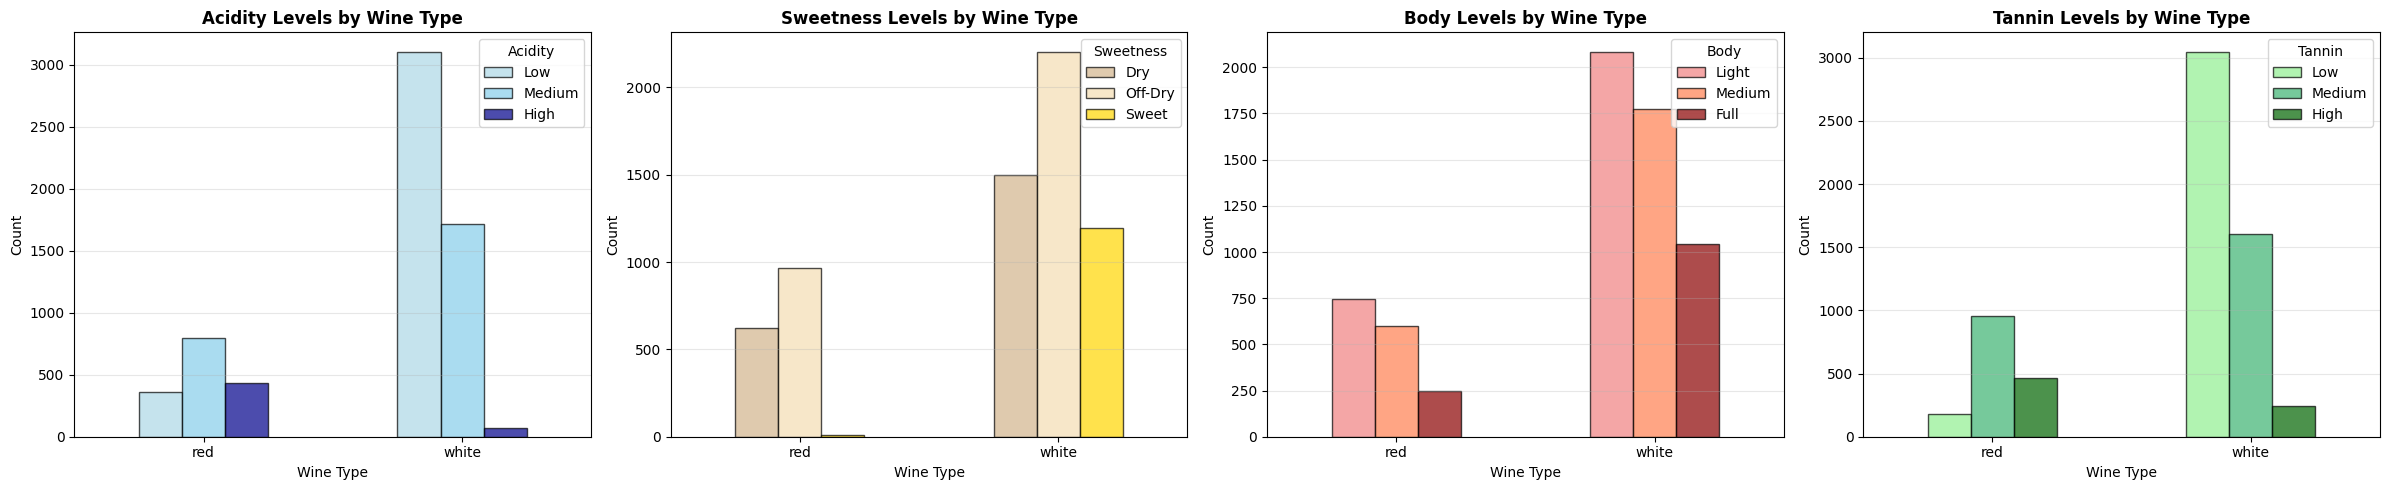

In [11]:
# Chemical categories visualization
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Acidity levels by wine type
pd.crosstab(df_wines['type'], df_wines['acidity_level']).plot(
    kind='bar', ax=axes[0],
    color=['lightblue', 'skyblue', 'darkblue'],
    alpha=0.7, edgecolor='black'
)
axes[0].set_title('Acidity Levels by Wine Type', fontweight='bold')
axes[0].set_xlabel('Wine Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Acidity', loc='upper right')
axes[0].grid(axis='y', alpha=0.3)

# Sweetness levels by wine type
pd.crosstab(df_wines['type'], df_wines['sweetness_level']).plot(
    kind='bar', ax=axes[1],
    color=['tan', 'wheat', 'gold'],
    alpha=0.7, edgecolor='black'
)
axes[1].set_title('Sweetness Levels by Wine Type', fontweight='bold')
axes[1].set_xlabel('Wine Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Sweetness', loc='upper right')
axes[1].grid(axis='y', alpha=0.3)

# Body levels by wine type
pd.crosstab(df_wines['type'], df_wines['body_level']).plot(
    kind='bar', ax=axes[2],
    color=['lightcoral', 'coral', 'darkred'],
    alpha=0.7, edgecolor='black'
)
axes[2].set_title('Body Levels by Wine Type', fontweight='bold')
axes[2].set_xlabel('Wine Type')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(title='Body', loc='upper right')
axes[2].grid(axis='y', alpha=0.3)

# Tannin levels by wine type
pd.crosstab(df_wines['type'], df_wines['tannin_proxy']).plot(
    kind='bar', ax=axes[3],
    color=['lightgreen', 'mediumseagreen', 'darkgreen'],
    alpha=0.7, edgecolor='black'
)
axes[3].set_title('Tannin Levels by Wine Type', fontweight='bold')
axes[3].set_xlabel('Wine Type')
axes[3].set_ylabel('Count')
axes[3].tick_params(axis='x', rotation=0)
axes[3].legend(title='Tannin', loc='upper right')
axes[3].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Summary**
- Acidity Levels by Wine Type
  - White wine shows significantly higher counts across all acidity levels, especially medium and high acidity
  - Red wine tends to cluster in low–medium acidity, with very few high-acid reds
- Sweetness Levels by Wine Type
  - White wines dominate every sweetness category: dry, off-dry, and sweet
  - There are many more sweet and off-dry whites than sweet reds
  - Red wines are overwhelmingly dry, with almost no sweet entries
- Body Levels by Wine Type
  - White wine shows higher counts for all body levels:light, medium, and full
  - Red wines are mostly medium and full-bodied, with fewer light-bodied examples
- Tannin Levels by Wine Type
  - Red wines show much higher medium and high tannin counts compared to whites
  - White wines are overwhelmingly low-tannin, with very few medium/high tannin entries

Below, we create boxplots of each chemical property and their correlation with wine quality

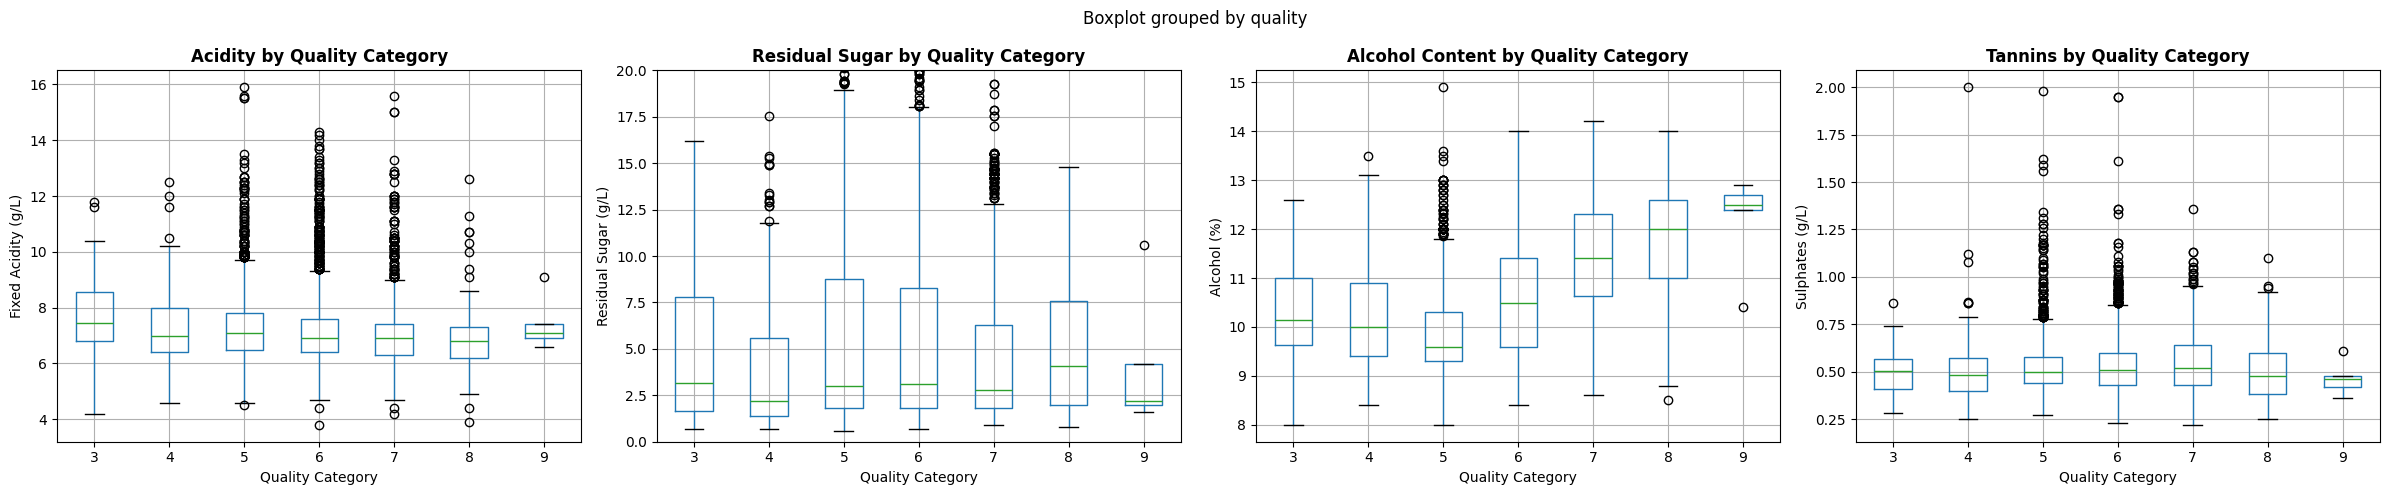

In [12]:
# Chemical properties vs Quality visualization
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Acidity vs Quality
df_wines.boxplot(column='fixed acidity', by='quality', ax=axes[0])
axes[0].set_title('Acidity by Quality Category', fontweight='bold')
axes[0].set_xlabel('Quality Category')
axes[0].set_ylabel('Fixed Acidity (g/L)')
plt.sca(axes[0])

# Sugar vs Quality
df_wines.boxplot(column='residual sugar', by='quality', ax=axes[1])
axes[1].set_title('Residual Sugar by Quality Category', fontweight='bold')
axes[1].set_xlabel('Quality Category')
axes[1].set_ylabel('Residual Sugar (g/L)')
axes[1].set_ylim(0, 20)  # Focus on main distribution
plt.sca(axes[1])

# Alcohol vs Quality
df_wines.boxplot(column='alcohol', by='quality', ax=axes[2])
axes[2].set_title('Alcohol Content by Quality Category', fontweight='bold')
axes[2].set_xlabel('Quality Category')
axes[2].set_ylabel('Alcohol (%)')
plt.sca(axes[2])

# Tannins vs Quality
df_wines.boxplot(column='sulphates', by='quality', ax=axes[3])
axes[3].set_title('Tannins by Quality Category', fontweight='bold')
axes[3].set_xlabel('Quality Category')
axes[3].set_ylabel('Sulphates (g/L)')
plt.sca(axes[3])

plt.tight_layout()
plt.show()

**Summary:**
- **Acidity**: White wines show higher acidity levels - explains traditional pairing with seafood and acidic foods
- **Sweetness**: Most wines are "Dry" (low residual sugar), with whites having more sweet/off-dry examples
- **Body**: Red wines tend toward full body (higher alcohol content), whites are lighter - matching traditional pairing rules
- **Tannins**: Red wines have a higher proportion of medium-to-high tannins while white wines are dominated by low tannins

**Intepretation**
- **Quality Connection**: Higher quality wines show higher alcohol content and specific acidity ranges
- **Pairing Implications**: These chemical differences directly explain why reds pair with heavy/fatty foods and whites with light/acidic foods

## Proposed Models

Based on our EDA, we are considering either a classification or regression model that leverage the chemical composition and food pairing datasets.

### Model 1: Classification - Predicting Food Category From Chemical Properties

**Research Question**: Can we predict which food category a wine best pairs with based on its chemical composition?

**Model Type**: Multi Class Classification model using Logistic Regression

**Independent Variables**:
- Alcohol content - for body/weight
- Fixed acidity - for acidic food pairing
- pH - overall acidity measure
- Residual sugar - for sweetness
- Sulphates - for tannins
- Volatile acidity - for acidity
- Wine type

**Dependent Varable**:
- Food Category - from the 12 categories there are (Red Meat, Seafood, Poultry, Cheese, Dessert, Spicy, Vegetarian, Acidic, Smoky BBQ, Salty Snack, Creamy, Pork)

**Why this model?**
- From our EDA we can see chemical differences between the red/white wines correlate to different food pairing patterns
- Chemical categories that we have created align pretty well with good food pairing patterns

### Model 2: Regression - Predict Wine and Food Pairing Quality Score

**Research Question**: Can wine chemical properties predict how well a wine will pair with a specific food type, in terms of its quality score from 1-5?

**Model Type**: Regression Model using Linear Regression

**Independent Variables**:
- All chemical properties df_wines
- Wine type
- Food category
- Other created features like Acidity Levels, Sweetness Levels, etc.

**Dependent Variable**:
- Pairing quality score from 1-5

In [13]:
%shell jupyter nbconvert --to html /content/data-science-final-project/DataScienceProject.ipynb --output index.html

[NbConvertApp] Converting notebook /content/data-science-final-project/DataScienceProject.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1132317 bytes to /content/data-science-final-project/index.html
